In [4]:
%pip install pandas matplotlib seaborn wordcloud

In [2]:
import pandas as pd

# Load the data
df = pd.read_csv('Twitter_Data.csv')

# Drop any rows with missing text or categories
df = df.dropna()

# Map categories to text labels for better visualization
sentiment_map = {-1: 'Negative', 0: 'Neutral', 1: 'Positive'}
df['sentiment_label'] = df['category'].map(sentiment_map)

df.head()

,clean_text,category,sentiment_label
0,when modi promised “minimum government maximum...,-1.0,Negative
1,talk all the nonsense and continue all the dra...,0.0,Neutral
2,what did just say vote for modi welcome bjp t...,1.0,Positive
3,asking his supporters prefix chowkidar their n...,1.0,Positive
4,answer who among these the most powerful world...,1.0,Positive


<ipython-input-3-0938a9d1d2d4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment_label', palette='viridis')


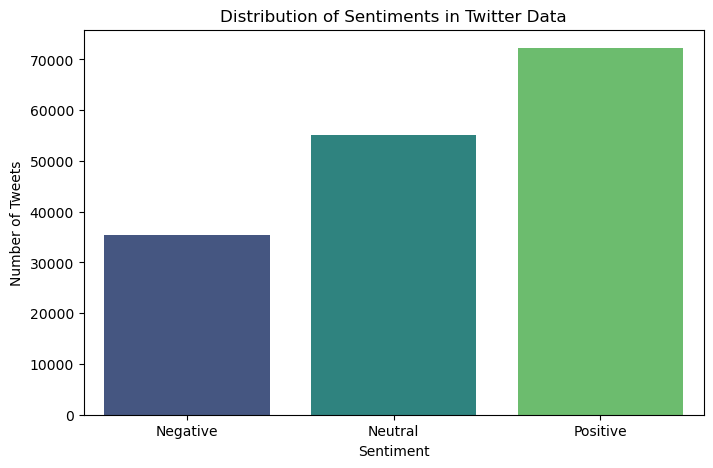

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment_label', palette='viridis')
plt.title('Distribution of Sentiments in Twitter Data')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

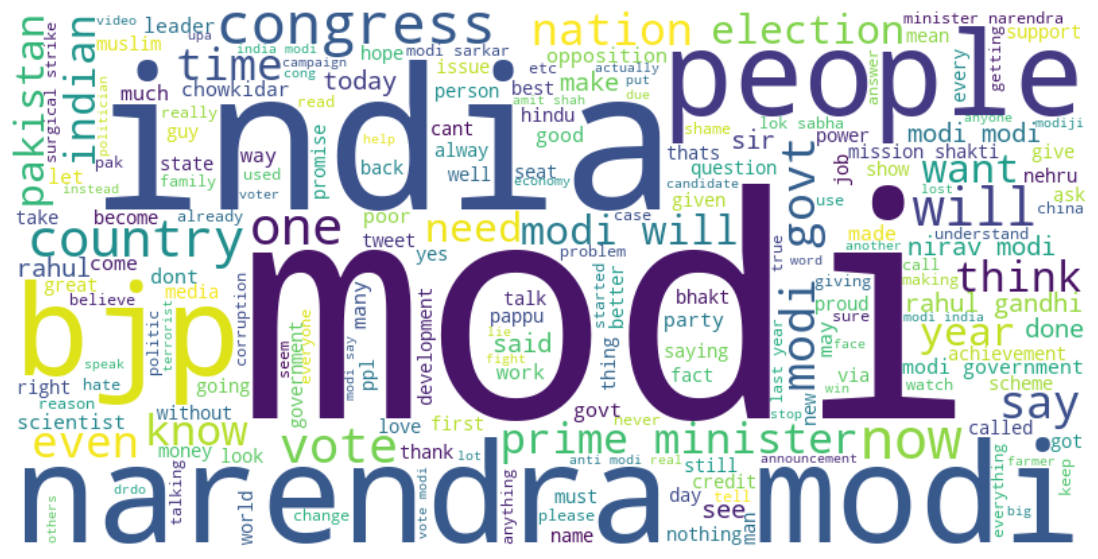

In [5]:
from wordcloud import WordCloud

# Combine all tweets into one large string
text = " ".join(review for review in df.clean_text.astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)

# Display the generated image
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

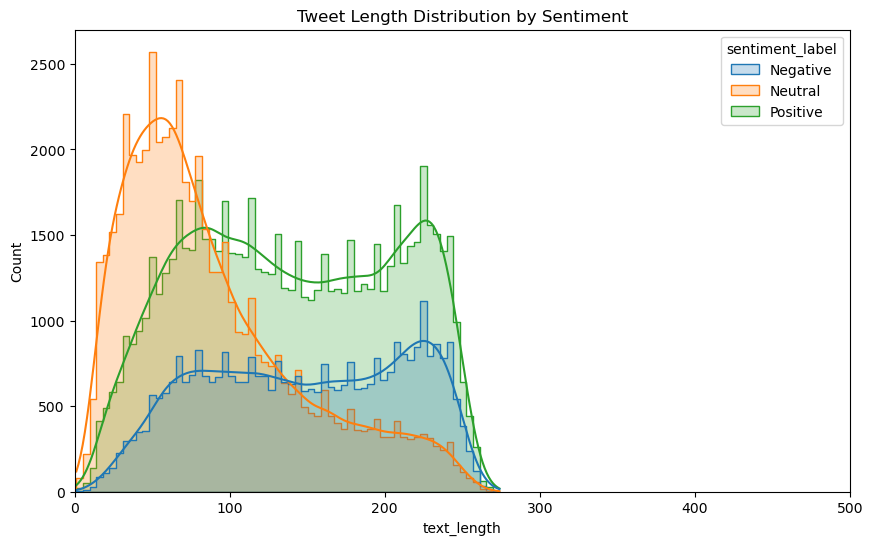

In [6]:
# Create a column for the length of each tweet
df['text_length'] = df['clean_text'].apply(lambda x: len(str(x)))

# Plot distribution of length by sentiment
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', hue='sentiment_label', kde=True, element="step")
plt.title('Tweet Length Distribution by Sentiment')
plt.xlim(0, 500) # Adjust based on your data
plt.show()